In [1]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

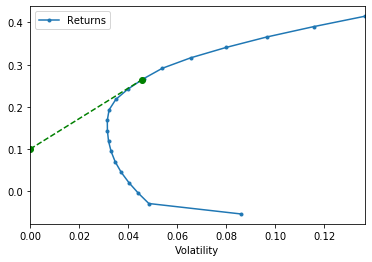

In [11]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color = "green", marker = "o", linestyle = "dashed")

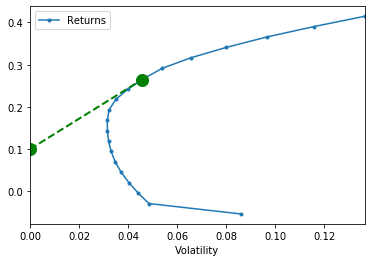

In [14]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = .1)

In [15]:
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [16]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [18]:
erk.msr(.1, np.array([.11,.12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [19]:
erk.msr(.1, np.array([.10,.13]), cov.loc[l,l])

array([0., 1.])

In [20]:
erk.msr(.1, np.array([.12,.11]), cov.loc[l,l])

array([0.85367807, 0.14632193])

In [21]:
erk.msr(.1, np.array([.13,.10]), cov.loc[l,l])

array([1., 0.])

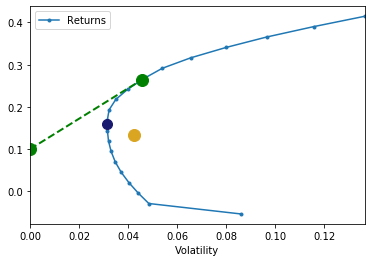

In [26]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = .1, show_ew = True, show_gmv = True)